In [22]:
import random
import math
import numpy as np

# Training data set with 20 observations

We generate the x values and the corresponding y values as follows

In [23]:
random.seed(69)
xvalues = np.random.uniform(-1, 1, 20)
xmatrix =  np.column_stack((np.ones(20), xvalues))


In [24]:
yvalues = np.exp(xvalues) + np.random.normal(0, 1, 20)
ymatrix = yvalues.reshape((20,1)) 

In [25]:
x_transpose = np.transpose(xmatrix)
betamatrix = np.linalg.inv(x_transpose @ xmatrix) @ x_transpose @ ymatrix
print(betamatrix)

[[1.36344251]
 [1.68214758]]


# Functions for carrying out gradient descent 

In [26]:
def predictvalues(slope, intercept, xvalues):
    predicted_values = (slope*xvalues) + intercept
    return predicted_values
        

Predictvalues(slope,intercept,xvalues) gives the predicted values for a given slope and intercept, when xvalues are the input

In [27]:
def lossfunction(slope,intercept, xvalues, yvalues):
    residuals = (yvalues - predictvalues(slope, intercept, xvalues))/(len(xvalues)) 
    residuals_squared = residuals**2
    return sum(residuals_squared)
    
        
    
    

This is just loss function, which gives the sum of squared differences between the predicted values and the actual values.

In [28]:
def loss_function_gradient(slope,intercept,xvalues, yvalues):
    d2 = (- 2 * xvalues * (yvalues - predictvalues(slope,intercept,xvalues)))/len(xvalues)
    actual_d2 = sum(d2)
    d1 = (- 2 * (yvalues - predictvalues(slope,intercept,xvalues)))/len(xvalues)
    actual_d1 = sum(d1)
    gradient_vector = np.array([actual_d1, actual_d2])
    return gradient_vector
                    
    

This gives us the gradient vector of the loss function where the first entry is the derivative of the loss function with respect to the intercept, and the second entry is the derivative with respect to the slope.

In [29]:
def gradient_descent(learning_rate, number_of_steps, initial_slope, initial_intercept,xvalues, yvalues):
    slope = initial_slope
    intercept = initial_intercept
    parameters = np.array([intercept, slope])
    for i in range(number_of_steps):
        gradient = loss_function_gradient(slope,intercept,xvalues, yvalues)
        parameters[0] =  parameters[0] - (learning_rate * gradient[0])
        parameters[1] =  parameters[1] - (learning_rate * gradient[1])
        intercept = parameters[0]
        slope = parameters[1]
    return parameters  
    

For n(number_of_steps) number of steps, the returns a vector with the first entry as b_n intercept and the second entry as the a_n slope for a given learning rate.

In [30]:
def gradient_descent_param(learning_rate, number_of_steps, initial_slope, initial_intercept, xvalues, yvalues):
    slope = initial_slope
    intercept = initial_intercept
    parameters = np.array([intercept, slope])
    parametric_errors = np.zeros(number_of_steps)
    for i in range(number_of_steps):
        gradient = loss_function_gradient(slope,intercept,xvalues, yvalues)
        parameters[0] =  parameters[0] - (learning_rate * gradient[0])
        parameters[1] =  parameters[1] - (learning_rate * gradient[1])
        parametric_error = np.sqrt(((betamatrix[0] - parameters[0])**2)+((betamatrix[1] - parameters[1])**2))
        parametric_errors[i] = parametric_error
        intercept = parameters[0]
        slope = parameters[1]
    return parametric_errors 

The function returns a vector with parametric error for each step upto the nth step at a given learning rate.

In [31]:
def gradient_descent_values(learning_rate, number_of_steps, initial_slope, initial_intercept,xvalues, yvalues):
    slope = initial_slope
    intercept = initial_intercept
    parameters = np.array([intercept, slope])
    adjusted_parameters = np.zeros((number_of_steps, 2))
    parametric_errors = np.zeros(number_of_steps)
    for i in range(number_of_steps):
        gradient = loss_function_gradient(slope,intercept,xvalues, yvalues)
        parameters[0] =  parameters[0] - (learning_rate * gradient[0])
        parameters[1] =  parameters[1] - (learning_rate * gradient[1])
        adjusted_parameters[i,0]= parameters[0]
        adjusted_parameters[i,1]= parameters[1]
        intercept = parameters[0]
        slope = parameters[1]
    return adjusted_parameters  

This returns the values of a and b for each corresponding step. We will use this to depict the path
of the gradient descent algorithm for different values of the learning rate and for different initial values (a_0,b_0)

# Parametric errors

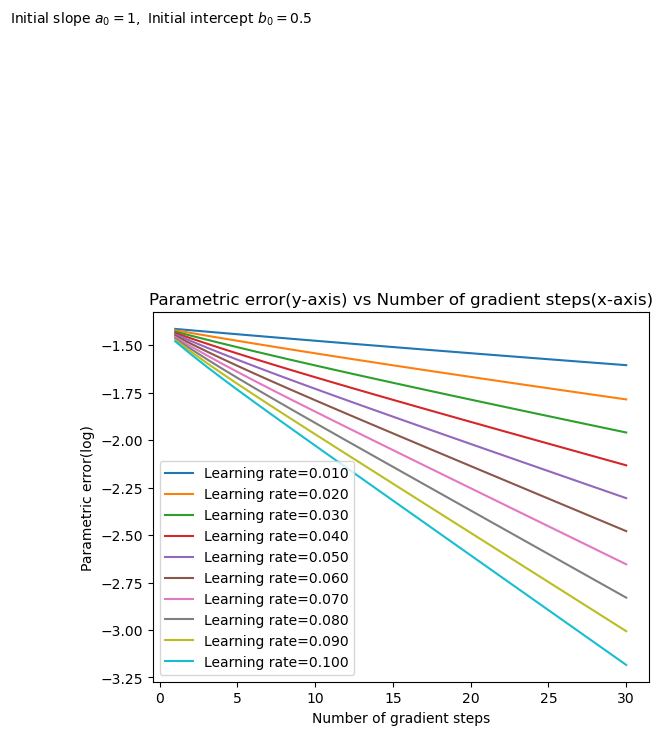

In [38]:
learning_rates = np.linspace(0.01,0.1,10)
for rate in learning_rates:
    plt.plot(np.arange(1,31), np.log(gradient_descent_param(rate, 30 , 1, .5, xvalues, yvalues)), label = f"Learning rate={rate:.3f}")
plt.xlabel('Number of gradient steps')
plt.ylabel('Parametric error(log)')
plt.title("Parametric error(y-axis) vs Number of gradient steps(x-axis)")
plt.text(.1, .2,  r'$\mathrm{Initial\ slope}\ a_{0} = 1,\ \mathrm{Initial\ intercept}\ b_{0} = 0.5$', ha = 'center')
plt.legend()

Here, we can see the parametric error for differnt learning rates when a_0 = 1 and b_0 = .5. We notice that as we increase our stepsize the paramteric errors decrease at a faster. This indicates faster convergence with a larger stepsize when initial slope = 1 and initial intercept = .5 

# Training loss 

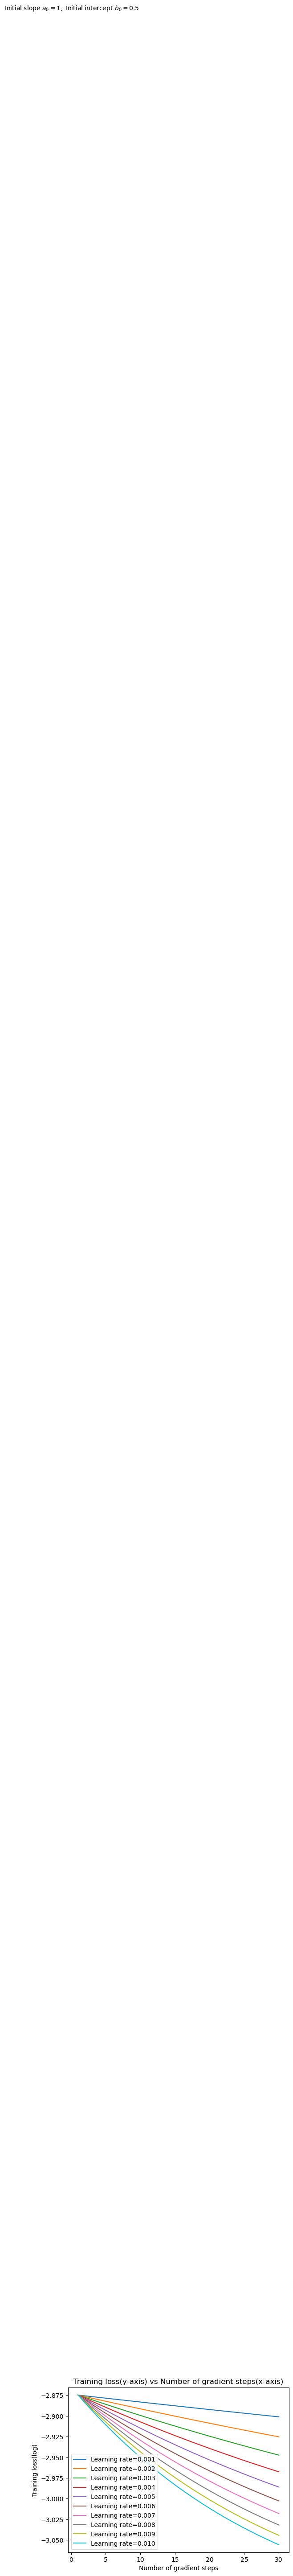

In [12]:
for rate in learning_rates:
    training_loss = np.zeros(30)
    for i in range(30):
        p_vector = gradient_descent(rate, i, 1, .5,xvalues, yvalues)
        training_loss[i] = lossfunction(p_vector[1], p_vector[0], xvalues,yvalues)
    plt.plot(np.arange(1,31),np.log(training_loss), label = f"Learning rate={rate:.3f}")

plt.xlabel('Number of gradient steps')
plt.ylabel('Training loss(log)')
plt.title('Training loss(y-axis) vs Number of gradient steps(x-axis)')
plt.text(.1, .01, r'$\mathrm{Initial\ slope}\ a_{0} = 1,\ \mathrm{Initial\ intercept}\ b_{0} = 0.5$', ha='center')
plt.legend()

    

# Test loss 

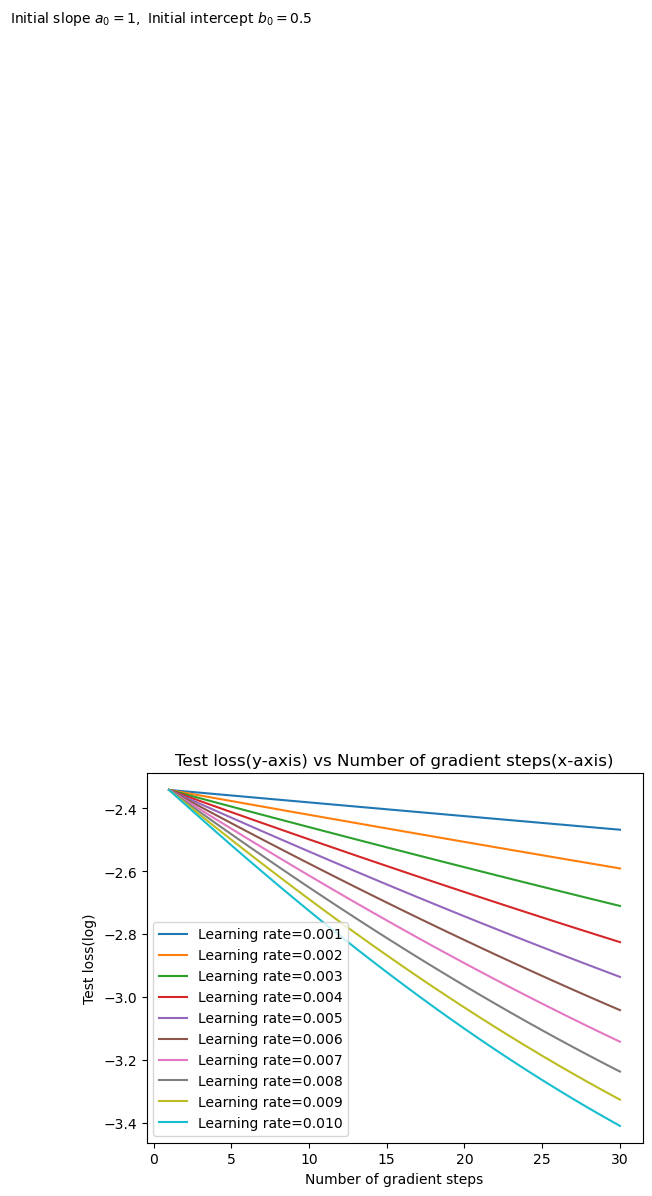

In [13]:
xvalues_test = np.random.uniform(-1, 1, 5)
yvalues_test = np.exp(xvalues_test) + np.random.normal(0,1,5)
for rate in learning_rates:
    test_loss = np.zeros(30)
    for i in range(30):
        p_vector = gradient_descent(rate, i, 1, .5,xvalues_test, yvalues_test)
        test_loss[i] = lossfunction(p_vector[1], p_vector[0], xvalues_test,yvalues_test)
    plt.plot(np.arange(1,31),np.log(test_loss), label = f"Learning rate={rate:.3f}")
    
plt.xlabel('Number of gradient steps')
plt.ylabel('Test loss(log)')
plt.title('Test loss(y-axis) vs Number of gradient steps(x-axis)')
plt.text(.5 , .1,  r'$\mathrm{Initial\ slope}\ a_{0} = 1,\ \mathrm{Initial\ intercept}\ b_{0} = 0.5$', ha = 'center')
plt.legend()

# Contour plot with different parameters

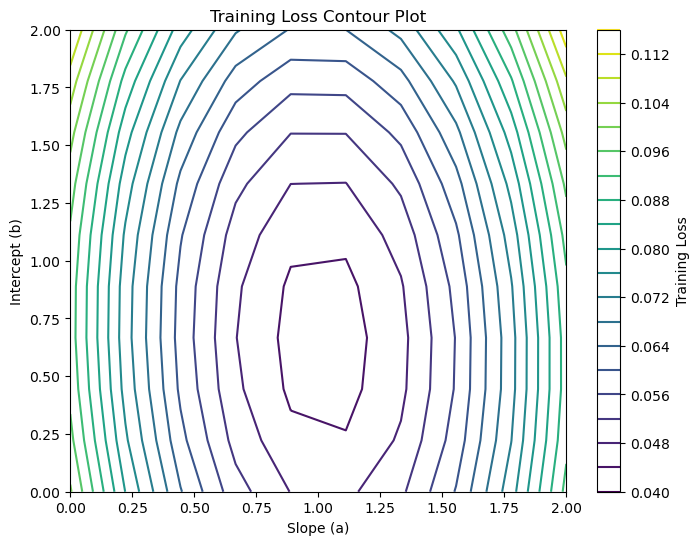

In [14]:
slopes = np.linspace(0,2,10)
intercepts = np.linspace(0,2,10)
a,b = np.meshgrid(slopes, intercepts)
lossvalues = np.zeros_like(a)
for i in range(len(a)):
    for j in range(len(b)):
        lossvalues[i, j] = lossfunction(slopes[i], intercepts[j], xvalues, yvalues)

plt.figure(figsize=(8, 6))
contour_plot = plt.contour(a, b, lossvalues, levels=20, cmap='viridis')
plt.title('Training Loss Contour Plot')
plt.xlabel('Slope (a)')
plt.ylabel('Intercept (b)')
plt.colorbar(label='Training Loss')
plt.savefig('contour.png')

# When initial slope = .25, initial intercept = .2 

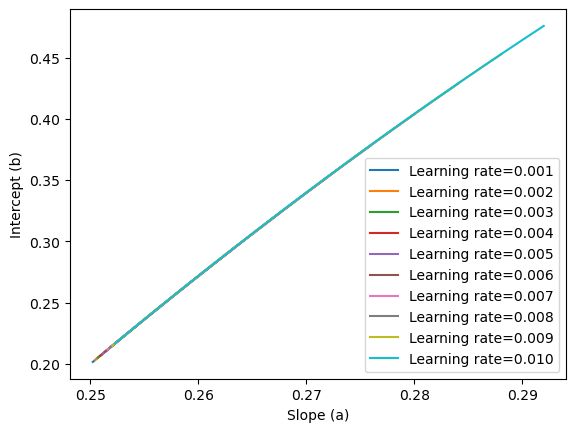

In [15]:

for rate in learning_rates:
    changes = gradient_descent_values(rate, 20, .25, .2,xvalues, yvalues)
    a_vector = np.zeros(20)
    b_vector = np.zeros(20)
    for i in range(20):
        a_vector[i] = changes[i][1]
        b_vector[i]= changes[i][0]
    plt.plot(a_vector, b_vector, label = f"Learning rate={rate:.3f}") 
    plt.xlabel('Slope (a)')
    plt.ylabel('Intercept (b)')
    plt.legend()

# When initial slope = 1, and initial intercept = .1 


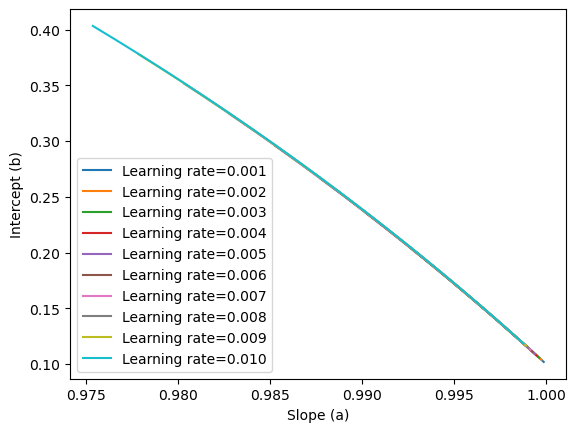

In [16]:
for rate in learning_rates:
    changes = gradient_descent_values(rate, 20, 1, .1,xvalues, yvalues)
    a_vector = np.zeros(20)
    b_vector = np.zeros(20)
    for i in range(20):
        a_vector[i] = changes[i][1]
        b_vector[i]= changes[i][0]
    plt.plot(a_vector, b_vector, label = f"Learning rate={rate:.3f}") 
    plt.xlabel('Slope (a)')
    plt.ylabel('Intercept (b)')
    plt.legend()

# When initial slope is = 1, initial intercept = .8


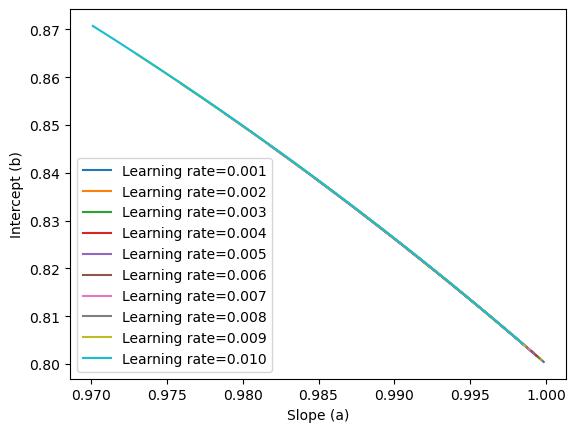

In [17]:
for rate in learning_rates:
    changes = gradient_descent_values(rate, 20, 1, .8,xvalues, yvalues)
    a_vector = np.zeros(20)
    b_vector = np.zeros(20)
    for i in range(20):
        a_vector[i] = changes[i][1]
        b_vector[i]= changes[i][0]
    plt.plot(a_vector, b_vector, label = f"Learning rate={rate:.3f}") 
    plt.xlabel('Slope (a)')
    plt.ylabel('Intercept (b)')
    plt.legend()

# When initial slope is 1.5 and initial intercept is 1

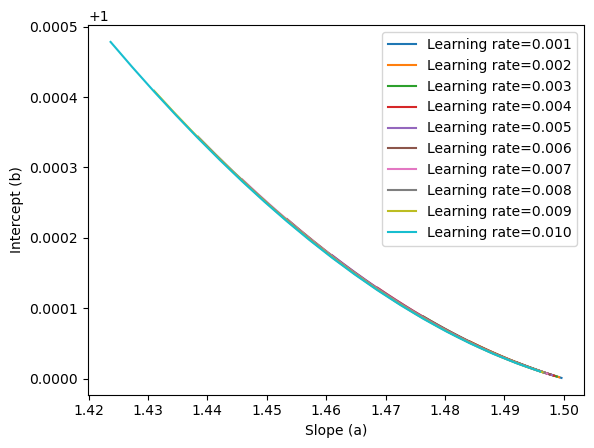

In [18]:
for rate in learning_rates:
    changes = gradient_descent_values(rate, 20, 1.5, 1,xvalues, yvalues)
    a_vector = np.zeros(20)
    b_vector = np.zeros(20)
    for i in range(20):
        a_vector[i] = changes[i][1]
        b_vector[i]= changes[i][0]
    plt.plot(a_vector, b_vector, label = f"Learning rate={rate:.3f}") 
    plt.xlabel('Slope (a)')
    plt.ylabel('Intercept (b)')
    plt.legend()

# When initial slope = .25, inital intercept = 1.2

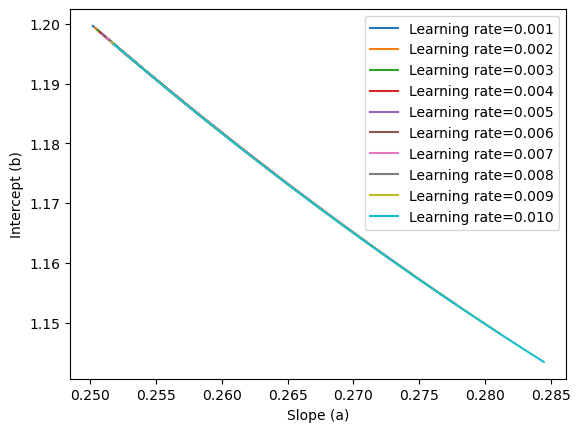

In [19]:
for rate in learning_rates:
    changes = gradient_descent_values(rate, 20, .25, 1.2,xvalues, yvalues)
    a_vector = np.zeros(20)
    b_vector = np.zeros(20)
    for i in range(20):
        a_vector[i] = changes[i][1]
        b_vector[i]= changes[i][0]
    plt.plot(a_vector, b_vector, label = f"Learning rate={rate:.3f}") 
    plt.xlabel('Slope (a)')
    plt.ylabel('Intercept (b)')
    plt.legend()

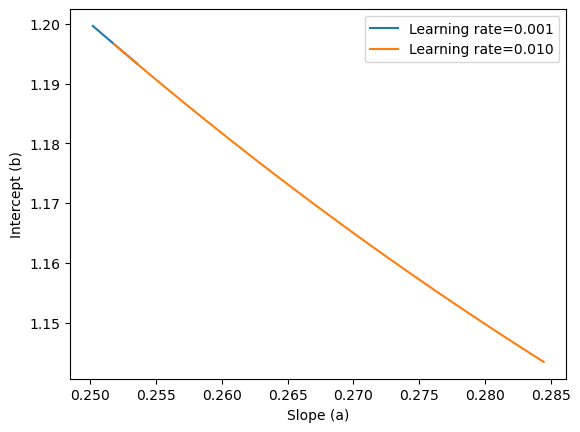

In [20]:
learning_rates1 = np.array([.001,.01])
for rate in learning_rates1:
    changes = gradient_descent_values(rate, 20, .25, 1.2,xvalues, yvalues)
    a_vector = np.zeros(20)
    b_vector = np.zeros(20)
    for i in range(20):
        a_vector[i] = changes[i][1]
        b_vector[i]= changes[i][0]
    plt.plot(a_vector, b_vector, label = f"Learning rate={rate:.3f}") 
plt.xlabel('Slope (a)')
plt.ylabel('Intercept (b)')
plt.legend()

In [21]:
changes = gradient_descent_values(.001, 20, .25, 1.2,xvalues, yvalues)
print(changes)

[[1.19966037 0.25017878]
 [1.19932141 0.2503575 ]
 [1.19898312 0.25053615]
 [1.1986455  0.25071473]
 [1.19830854 0.25089324]
 [1.19797225 0.25107168]
 [1.19763663 0.25125006]
 [1.19730166 0.25142837]
 [1.19696736 0.25160661]
 [1.19663372 0.25178478]
 [1.19630074 0.25196288]
 [1.19596841 0.25214092]
 [1.19563674 0.25231889]
 [1.19530573 0.25249679]
 [1.19497537 0.25267463]
 [1.19464566 0.25285239]
 [1.1943166  0.25303009]
 [1.19398819 0.25320772]
 [1.19366044 0.25338528]
 [1.19333332 0.25356278]]
